
# Online Retail Dataset Analysis: Clustering and Classification

## Introduction
This project aims to analyze the Online Retail dataset to understand customer purchasing patterns. Using clustering, we will segment customers based on their behavior, and classification will help predict these customer segments based on purchasing characteristics.



## Dataset Overview
The Online Retail dataset contains transactional data for an online retail store, primarily in the UK. Key attributes include:

- **InvoiceNo**: Invoice number (unique identifier for each transaction).
- **StockCode**: Product (item) code.
- **Description**: Product description.
- **Quantity**: Number of products purchased.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the customer resides.

This data enables exploration of customer behavior and purchasing trends, providing a foundation for clustering and classification tasks.



## Objective
The objectives of this analysis are:
- **Clustering**: Segment customers into distinct groups based on their purchasing patterns to identify different types of customers.
- **Classification**: Build models to predict customer segments based on features derived from their purchasing behavior.



## Import Libraries
The following libraries will be used for data manipulation, visualization, and modeling:

- **pandas** for data handling
- **matplotlib** and **seaborn** for visualization
- **scikit-learn** for clustering and classification


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# DA libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# SKlearn libraries:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix ,classification_report
#any other needed libraries
from mlxtend.classifier import StackingClassifier


## Load and Inspect Data
Load the Online Retail dataset and display the first few rows to get an initial overview. This includes checking data structure, data types, and basic information.



## Exploratory Data Analysis (EDA)
### Dataset Information
1. **Data Types and Shape**: Check the data types and the structure of the dataset.
2. **Missing Values**: Identify columns with missing values and determine their significance.
3. **Descriptive Statistics**: Summarize numerical columns for insights into spending, quantity, and frequency.
4. **Unique Values**: Examine the uniqueness in categorical features like `CustomerID` and `StockCode`.

### Initial Visualizations
- **Transaction Histograms**: View the distribution of transactions and purchases over time.
- **Country Analysis**: Analyze transactions by country to identify the primary customer base.


In [4]:
df =  pd.read_csv('/content/drive/MyDrive/Business-Analysis-using-AI/Cluster-Classify-Task/Data/OnlineRetail.csv' , encoding='unicode_escape')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [7]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France

In [8]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [9]:
# The following records are wrongly recorded, we shall deal with them later.
df[df["Quantity"] < 0 ].value_counts().sum()

8905

In [10]:
# As per the requirements of our data, any Invoice number with more than 6 digits is not needed.
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df[df["InvoiceNo"].str.match("^\\d{6}$") == False]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[9291 rows x 8 columns]

In [11]:
df["InvoiceNo"].str.replace("[0-9]" , "" , regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df["InvoiceNo"].str.startswith("A")].head()

InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  8/12/2011 14:50   
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [13]:
df["StockCode"] = df["StockCode"].astype(str)
df[df["StockCode"].str.match("^\\d{5}$") == False ]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
45        536370      POST                              POSTAGE         3   
...          ...       ...                                  ...       ...   
541778    581578    84997C      CHILDRENS CUTLERY POLKADOT BLUE         8   
541809    581579    85099C       JUMBO  BAG BAROQUE BLACK WHITE        10   
541838    581580    84993A            75 GREEN PETIT FOUR CASES         2   
541844    581580    85049A        TRADITIONAL CHRISTMAS RIBBONS         1   
541853    581580    85049E            SCANDINAVIAN REDS RIBBONS         2   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
45       12/1/2010 8:45      18.00     12583.0          France  
...                 ...        ...         ...             ...  
541778  12/9/2011 12:16       4.15     12713.0         Germany  
541809  12/9/2011 12:19       1.79     17581.0  United Kingdom  
541838  12/9/2011 12:20       0.42     12748.0  United Kingdom  
541844  12/9/2011 12:20       1.25     12748.0  United Kingdom  
541853  12/9/2011 12:20       1.25     12748.0  United Kingdom  

[54873 rows x 8 columns]

In [14]:
df["StockCode"].str.replace("[0-9]" , "" , regex = True).unique()

array(['A', '', 'B', 'G', 'E', 'POST', 'L', 'C', 'S', 'BL', 'N', 'D', 'F',
       'T', 'H', 'M', 'P', 'J', 'R', 'DOT', 'K', 'V', 'W', 'BANK CHARGES',
       'bl', 'p', 'b', 'a', 'l', 's', 'c', 'e', 'I', 'Y', 'd', 'f', 'U',
       'AMAZONFEE', 'n', 'Z', 'O', 'DCGS', 'k', 'gift__', 'm', 'g',
       'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'DCGSP', 'CRUK', 'GR', 'LP'],
      dtype=object)

In [15]:
df["StockCode"].str.replace("[0-9]" , "" , regex = True).nunique()

53

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
df.isnull().sum().sum()

136534


## Data Cleaning and Preprocessing
### Handle Missing Values
- Drop rows with missing `CustomerID`, as they are essential for customer analysis.

### Remove Duplicates
- Check and remove any duplicate records that may skew analysis.

### Handle Outliers
- Filter out entries with negative quantities or unit prices, which are likely errors.

### Data Type Transformation
- Convert `InvoiceDate` to datetime format for time-based analysis.


In [18]:
# Create a copy of the original df.
cleaned_df = df.copy()

In [19]:
cleaned_df["InvoiceNo"] = cleaned_df["InvoiceNo"].astype("str")

# For the sake of clearness we'll create a mask for each dataset requirements.
mask = (
    cleaned_df["InvoiceNo"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [20]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    ( cleaned_df["StockCode"].str.match("^\\d{5}$") == True )
    |  ( cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True )
    |  ( cleaned_df["StockCode"].str.match("^PADS$") == True )
)

cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

<ipython-input-20-d79ddcf87644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [21]:
cleaned_df.dropna(subset = ["CustomerID"] , inplace = True)

<ipython-input-21-cdca2ab5a864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ["CustomerID"] , inplace = True)


In [22]:
# Get rid of of rows of unit price less than zero.
cleaned_df = cleaned_df[cleaned_df["UnitPrice"] > 0]

In [23]:
cleaned_df.describe().transpose()

count          mean          std        min       25%  \
Quantity    396340.0     13.012456   179.640568      1.000      2.00   
UnitPrice   396340.0      2.868200     4.264654      0.001      1.25   
CustomerID  396340.0  15301.689070  1709.957487  12346.000  13975.00   

                 50%       75%      max  
Quantity        6.00     12.00  80995.0  
UnitPrice       1.95      3.75    649.5  
CustomerID  15159.00  16803.00  18287.0

In [24]:
len(cleaned_df) / len(df)

0.7313774083840645

Droppped about 33% of the original dataset


## Feature Engineering
Derive new features to better understand customer purchasing behavior:

- **TotalSpend**: Total spend per transaction, calculated as `Quantity * UnitPrice`.
- **PurchaseFrequency**: Count of unique purchases by each customer.
- **Recency**: Number of days since the last purchase (from a reference date).
- **TotalQuantity**: Sum of items purchased by each customer.

These features allow us to capture customer engagement, spending, and frequency.


In [25]:
cleaned_df["TotalSpend"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]

cleaned_df.sample(5)

InvoiceNo StockCode                         Description  Quantity  \
427193    573379     23301   GARDENERS KNEELING PAD KEEP CALM         12   
396940    571105     22578  WOODEN STAR CHRISTMAS SCANDINAVIAN         3   
530218    580831     22471         TV DINNER TRAY AIR HOSTESS          8   
12472     537381     22162         HEART GARLAND RUSTIC PADDED         8   
282925    561671     22550                    HOLIDAY FUN LUDO        72   

             InvoiceDate  UnitPrice  CustomerID         Country  TotalSpend  
427193  10/30/2011 14:03       1.65     15680.0  United Kingdom       19.80  
396940  10/13/2011 16:01       0.29     17614.0  United Kingdom        0.87  
530218   12/6/2011 11:39       1.95     14418.0  United Kingdom       15.60  
12472    12/6/2010 13:13       2.95     14667.0  United Kingdom       23.60  
282925   7/28/2011 17:17       2.62     12830.0  United Kingdom      188.64

In [26]:
# The following query plays a huge role in our clustring and classification as the main features are built on it.
# The following is done for each customer:
# The MonetaryValue: assign a monetary value (the sum of the total spend)
# The Frequncy: is the number of orders a customer has. (we got it through unique invoice number.)
# The LastInvoiceDate: The last order a customer made.
aggregated_df = cleaned_df.groupby(by="CustomerID" , as_index=False).agg(MonetaryValue =("TotalSpend" , "sum") , Frequncy = ("InvoiceNo" , "nunique") , LastInvoiceDate = ("InvoiceDate" , "max"))
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4334 non-null   float64
 1   MonetaryValue    4334 non-null   float64
 2   Frequncy         4334 non-null   int64  
 3   LastInvoiceDate  4334 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 135.6+ KB


In [27]:
aggregated_df["LastInvoiceDate"] = pd.to_datetime(aggregated_df["LastInvoiceDate"])

aggregated_df["LastInvoiceDate"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 4334 entries, 0 to 4333
Series name: LastInvoiceDate
Non-Null Count  Dtype         
--------------  -----         
4334 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.0 KB


In [28]:
# From our LastInvoiceDate feature we'll extract the latest order each customer made in days.
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = ( max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

CustomerID  MonetaryValue  Frequncy     LastInvoiceDate  Recency
0     12346.0       77183.60         1 2011-01-18 10:01:00      325
1     12347.0        4310.00         7 2011-08-02 08:48:00      129
2     12348.0        1437.24         4 2011-09-25 13:13:00       74
3     12349.0        1457.55         1 2011-11-21 09:51:00       18
4     12350.0         294.40         1 2011-02-02 16:01:00      309

**Check for outliers (noise) in our data**

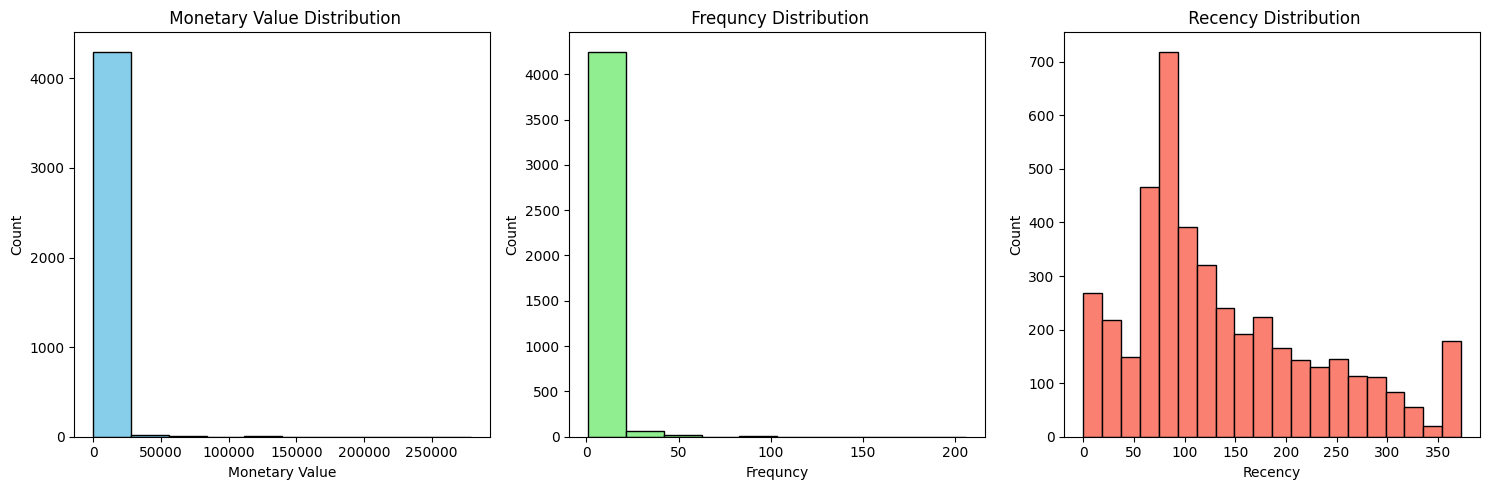

In [29]:
plt.figure(figsize=(15,5))


plt.subplot(1 ,3 ,1)
plt.hist(aggregated_df["MonetaryValue"] , bins = 10 , color = "skyblue" , edgecolor = "black")
plt.title(" Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1 ,3 ,2)
plt.hist(aggregated_df["Frequncy"] , bins = 10 , color = "lightgreen" , edgecolor = "black")
plt.title(" Frequncy Distribution")
plt.xlabel("Frequncy")
plt.ylabel("Count")

plt.subplot(1 ,3 ,3)
plt.hist(aggregated_df["Recency"] , bins = 20 , color = "salmon" , edgecolor = "black")
plt.title(" Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


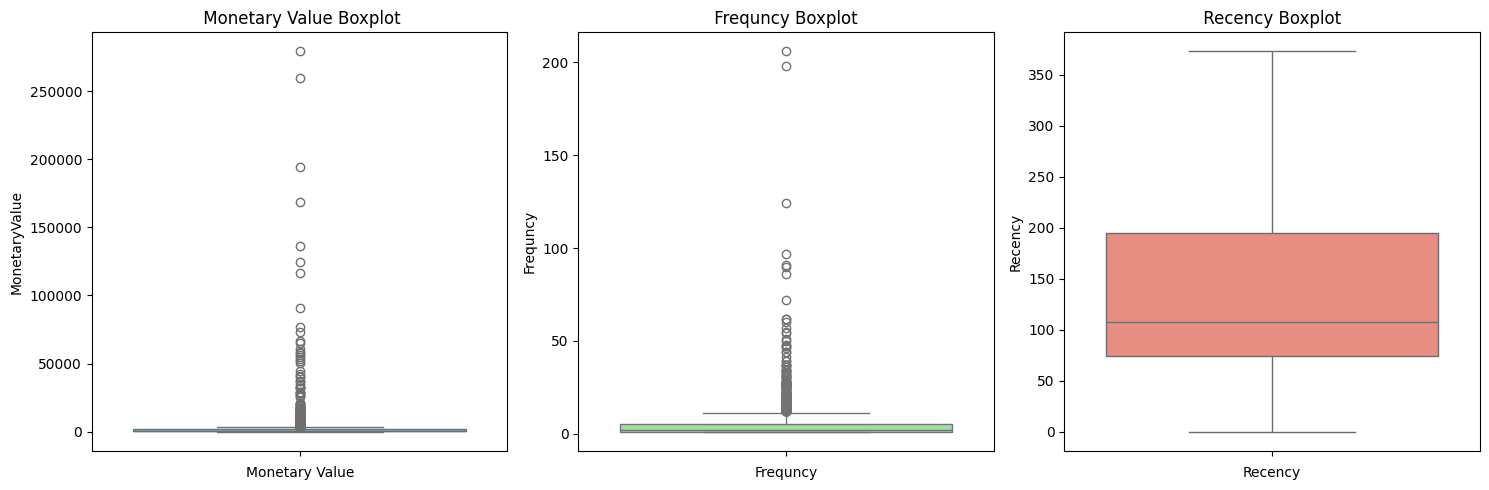

In [30]:
plt.figure(figsize=(15,5))


plt.subplot(1 ,3 ,1)
sns.boxplot(data=aggregated_df["MonetaryValue"]  , color = "skyblue" )
plt.title(" Monetary Value Boxplot")
plt.xlabel("Monetary Value")


plt.subplot(1 ,3 ,2)
sns.boxplot(data=aggregated_df["Frequncy"]  , color = "lightgreen")
plt.title(" Frequncy Boxplot ")
plt.xlabel("Frequncy")


plt.subplot(1 ,3 ,3)
sns.boxplot(data=aggregated_df["Recency"] , color = "salmon")
plt.title(" Recency Boxplot ")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

In [31]:
# At first we'll deal the outliers on the MonetaryValue feature:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1
# We'll store them in another df.
monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q1 + 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

CustomerID  MonetaryValue    Frequncy                LastInvoiceDate  \
count    761.000000     761.000000  761.000000                            761   
mean   15050.331143    8281.215205   12.411301  2011-08-24 05:40:38.081471744   
min    12346.000000    2294.780000    1.000000            2010-12-01 13:23:00   
25%    13471.000000    2885.240000    6.000000            2011-08-12 09:10:00   
50%    14907.000000    3883.250000    9.000000            2011-09-07 13:22:00   
75%    16633.000000    6363.590000   14.000000            2011-09-20 13:53:00   
max    18272.000000  279138.020000  206.000000            2011-12-08 15:44:00   
std     1778.150333   20082.853165   15.202677                            NaN   

          Recency  
count  761.000000  
mean   106.706965  
min      0.000000  
25%     79.000000  
50%     92.000000  
75%    119.000000  
max    372.000000  
std     49.431154

In [32]:
monetary_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 4323
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       761 non-null    float64       
 1   MonetaryValue    761 non-null    float64       
 2   Frequncy         761 non-null    int64         
 3   LastInvoiceDate  761 non-null    datetime64[ns]
 4   Recency          761 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 35.7 KB


In [33]:
# Secondly we'll deal the outliers on the Frequncy feature:
F_Q1 = aggregated_df["Frequncy"].quantile(0.25)
F_Q3 = aggregated_df["Frequncy"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequncy_outliers_df = aggregated_df[(aggregated_df["Frequncy"] > (F_Q1 + 1.5 * F_IQR))  ].copy()

Frequncy_outliers_df.describe()

CustomerID  MonetaryValue    Frequncy                LastInvoiceDate  \
count    553.000000     553.000000  553.000000                            553   
mean   15286.862568    9021.895136   16.198915  2011-09-01 19:00:19.312839168   
min    12362.000000     694.400000    8.000000            2010-12-02 09:44:00   
25%    13870.000000    2575.380000    9.000000            2011-08-28 12:29:00   
50%    15194.000000    4098.320000   12.000000            2011-09-08 15:22:00   
75%    16814.000000    6924.110000   17.000000            2011-09-21 15:12:00   
max    18283.000000  279138.020000  206.000000            2011-12-06 12:26:00   
std     1740.020113   22134.226505   16.539485                            NaN   

          Recency  
count  553.000000  
mean    98.141049  
min      2.000000  
25%     78.000000  
50%     91.000000  
75%    102.000000  
max    372.000000  
std     33.658478

In [34]:
Frequncy_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 15 to 4332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       553 non-null    float64       
 1   MonetaryValue    553 non-null    float64       
 2   Frequncy         553 non-null    int64         
 3   LastInvoiceDate  553 non-null    datetime64[ns]
 4   Recency          553 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 25.9 KB


In [35]:
# At last we'll get the non outliers dataframe.
non_outliers_df = aggregated_df[ (~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(Frequncy_outliers_df.index))]
non_outliers_df.describe()

CustomerID  MonetaryValue     Frequncy  \
count   3465.000000    3465.000000  3465.000000   
mean   15343.775469     656.436716     2.279654   
min    12348.000000       3.750000     1.000000   
25%    13863.000000     248.420000     1.000000   
50%    15366.000000     484.380000     2.000000   
75%    16803.000000     927.800000     3.000000   
max    18287.000000    2293.620000     7.000000   
std     1703.738099     528.443246     1.527842   

                     LastInvoiceDate      Recency  
count                           3465  3465.000000  
mean   2011-07-15 14:51:35.428571392   146.304762  
min              2010-12-01 09:53:00     0.000000  
25%              2011-05-08 16:06:00    72.000000  
50%              2011-08-08 10:59:00   123.000000  
75%              2011-09-27 12:53:00   214.000000  
max              2011-12-09 12:16:00   373.000000  
std                              NaN    99.465074

In [36]:
non_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3465 entries, 2 to 4333
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       3465 non-null   float64       
 1   MonetaryValue    3465 non-null   float64       
 2   Frequncy         3465 non-null   int64         
 3   LastInvoiceDate  3465 non-null   datetime64[ns]
 4   Recency          3465 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 162.4 KB


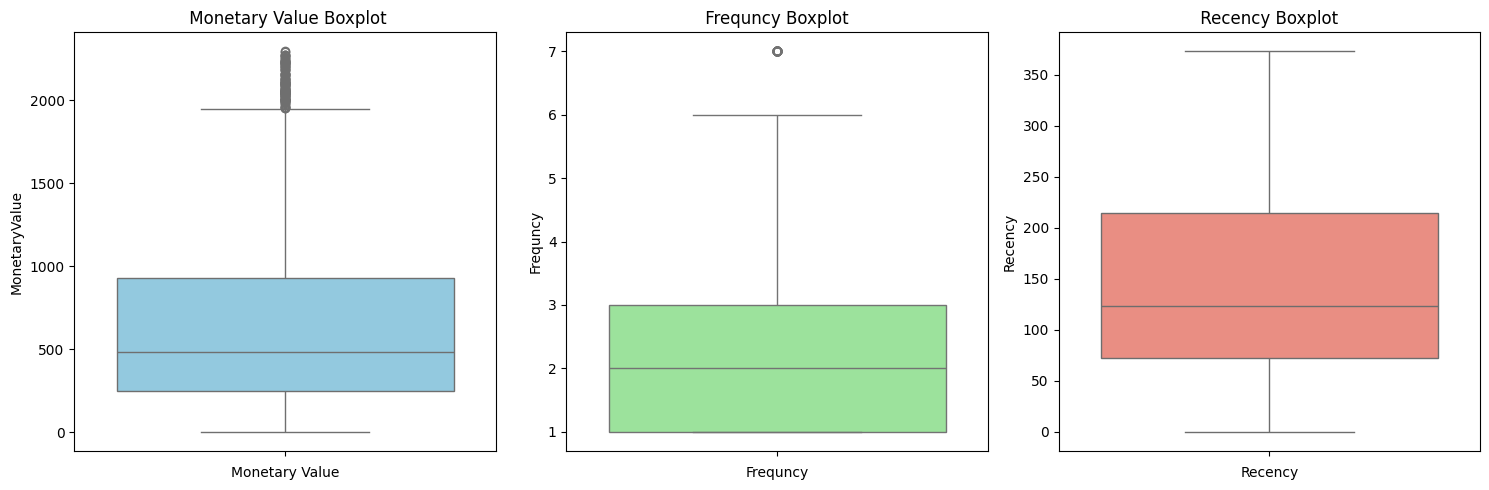

In [37]:
# Below are the results of dealing with outliers in the original df.
plt.figure(figsize=(15,5))


plt.subplot(1 ,3 ,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"]  , color = "skyblue" )
plt.title(" Monetary Value Boxplot")
plt.xlabel("Monetary Value")


plt.subplot(1 ,3 ,2)
sns.boxplot(data=non_outliers_df["Frequncy"]  , color = "lightgreen")
plt.title(" Frequncy Boxplot ")
plt.xlabel("Frequncy")


plt.subplot(1 ,3 ,3)
sns.boxplot(data=non_outliers_df["Recency"] , color = "salmon")
plt.title(" Recency Boxplot ")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

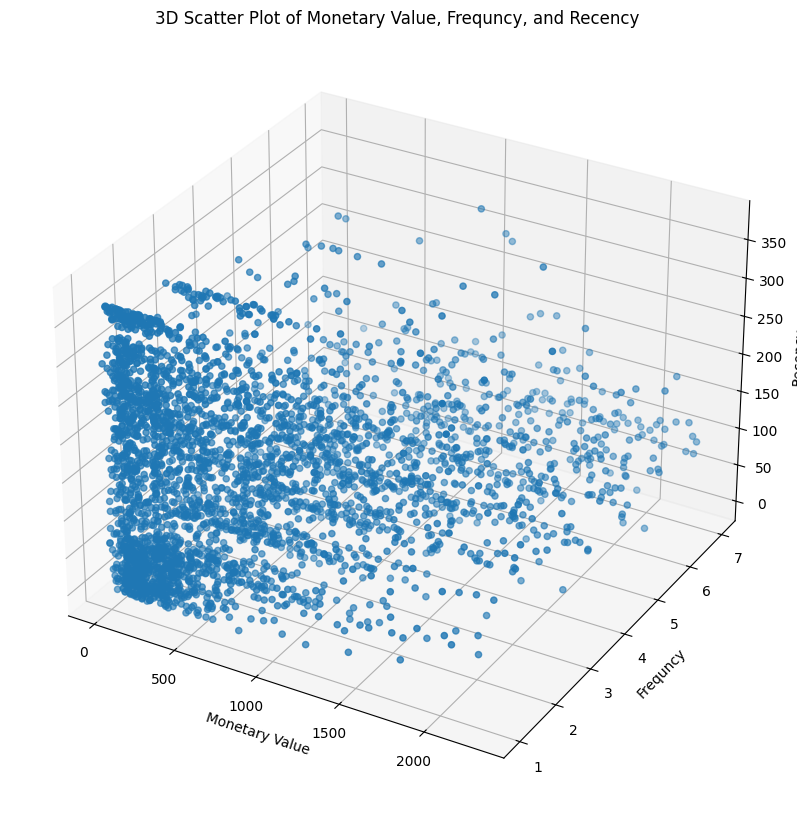

In [38]:
# Provided below is a 3d figure that shows the relation between each feature.
fig = plt.figure(figsize=(10, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter( non_outliers_df["MonetaryValue"], non_outliers_df["Frequncy"],non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")

ax.set_ylabel("Frequncy")

ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Monetary Value, Frequncy, and Recency")

plt.show()


## Clustering Analysis
### Data Standardization
- Scale the data to ensure features are comparable for clustering.

### K-Means Clustering
- Apply K-Means to group customers based on purchasing characteristics.
- Choose an optimal number of clusters based on silhouette scores.

### Cluster Evaluation
- Evaluate clusters using silhouette scores to determine clustering quality.

### Cluster Visualization
- Visualize clusters using two main features (e.g., TotalSpend vs. Recency) to interpret customer segments.


**At first we'll scale our data and encode it if needed**

In [39]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue" , "Frequncy" , "Recency"]])

scaled_data

array([[ 1.47776698,  1.12616031, -0.72704111],
       [ 1.51620617, -0.83767737, -1.29013407],
       [-0.68519935, -0.83767737,  1.63593827],
       ...,
       [-1.08942597, -0.83767737,  0.33881342],
       [-0.90540615, -0.18306481, -0.21422431],
       [ 2.23489225,  0.47154775,  0.54997328]])

In [40]:
scaled_data_df = pd.DataFrame(scaled_data ,  index = non_outliers_df.index , columns = ["MonetaryValue" , "Frequncy" , "Recency"])

scaled_data_df.head()

MonetaryValue  Frequncy   Recency
2       1.477767  1.126160 -0.727041
3       1.516206 -0.837677 -1.290134
4      -0.685199 -0.837677  1.635938
5       1.380297  3.089998 -0.757207
6      -1.073944 -0.837677  0.570084

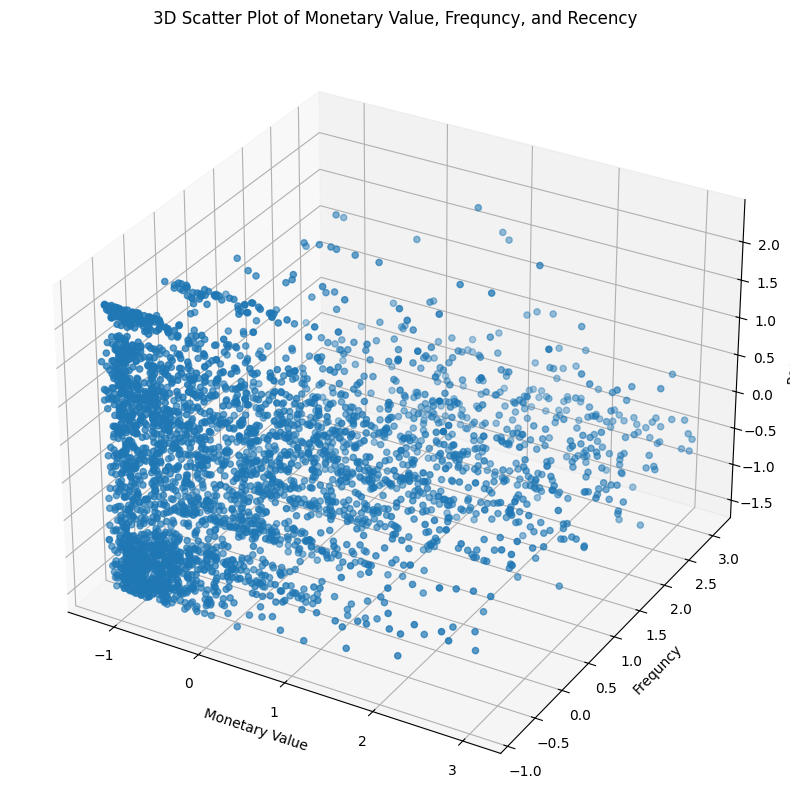

In [41]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequncy"],scaled_data_df["Recency"], )

ax.set_xlabel("Monetary Value")

ax.set_ylabel("Frequncy")

ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Monetary Value, Frequncy, and Recency")

plt.show()

**Now for clustring, we'll use kmeans clustring and the elbow method to determine the best number of clusters**

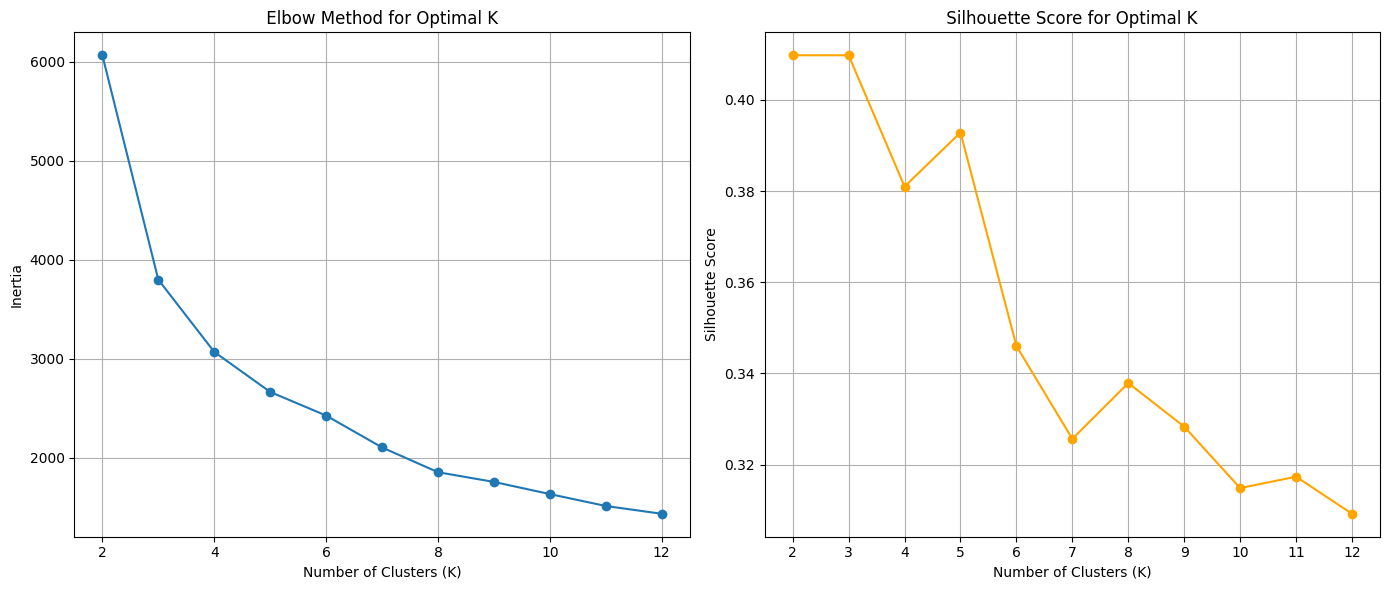

In [42]:
max_clusters = 12

inertia = []
silhoutte_scores = []
k_values = range(2 , max_clusters + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42 , max_iter = 1000)

    cluster_labels =  kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df , cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure( figsize = ( 14 , 6 ) )

plt.subplot(1 ,2 ,1)
plt.plot(k_values , inertia , marker = "o" )
plt.title(" Elbow Method for Optimal K ")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1 ,2 ,2)
plt.plot(k_values , silhoutte_scores , marker = "o" , color = "orange")
plt.title(" Silhouette Score for Optimal K ")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()

plt.show()

In [43]:
# According to the figure above, we find that four clusters is the best number of clusters.
kmeans = KMeans(n_clusters=4, random_state=42 , max_iter = 1000)

cluster_labels =  kmeans.fit_predict(scaled_data_df)

non_outliers_df["Cluster"] = cluster_labels

non_outliers_df.head()

<ipython-input-43-afc6cd6e2218>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


CustomerID  MonetaryValue  Frequncy     LastInvoiceDate  Recency  Cluster
2     12348.0        1437.24         4 2011-09-25 13:13:00       74        2
3     12349.0        1457.55         1 2011-11-21 09:51:00       18        3
4     12350.0         294.40         1 2011-02-02 16:01:00      309        0
5     12352.0        1385.74         7 2011-09-28 14:58:00       71        2
6     12353.0          89.00         1 2011-05-19 17:47:00      203        0

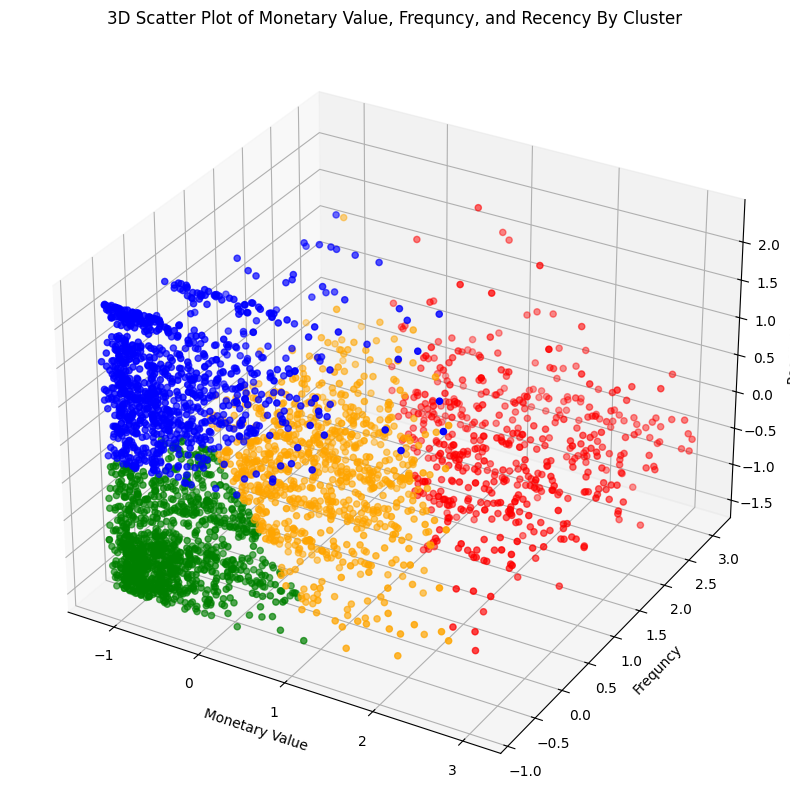

In [44]:
cluster_colors = {
    0: "blue",
    1: "green",
    2: "red",
    3: "orange"}

colors =  non_outliers_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter( scaled_data_df["MonetaryValue"], scaled_data_df["Frequncy"],scaled_data_df["Recency"], c = colors , marker = "o" )

ax.set_xlabel("Monetary Value")

ax.set_ylabel("Frequncy")

ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Monetary Value, Frequncy, and Recency By Cluster")

plt.show()

In [45]:
fig = px.scatter_3d(scaled_data_df, x = 'MonetaryValue', y = 'Frequncy', z = 'Recency', color = non_outliers_df['Cluster'], symbol = non_outliers_df['Cluster'])
fig.show()

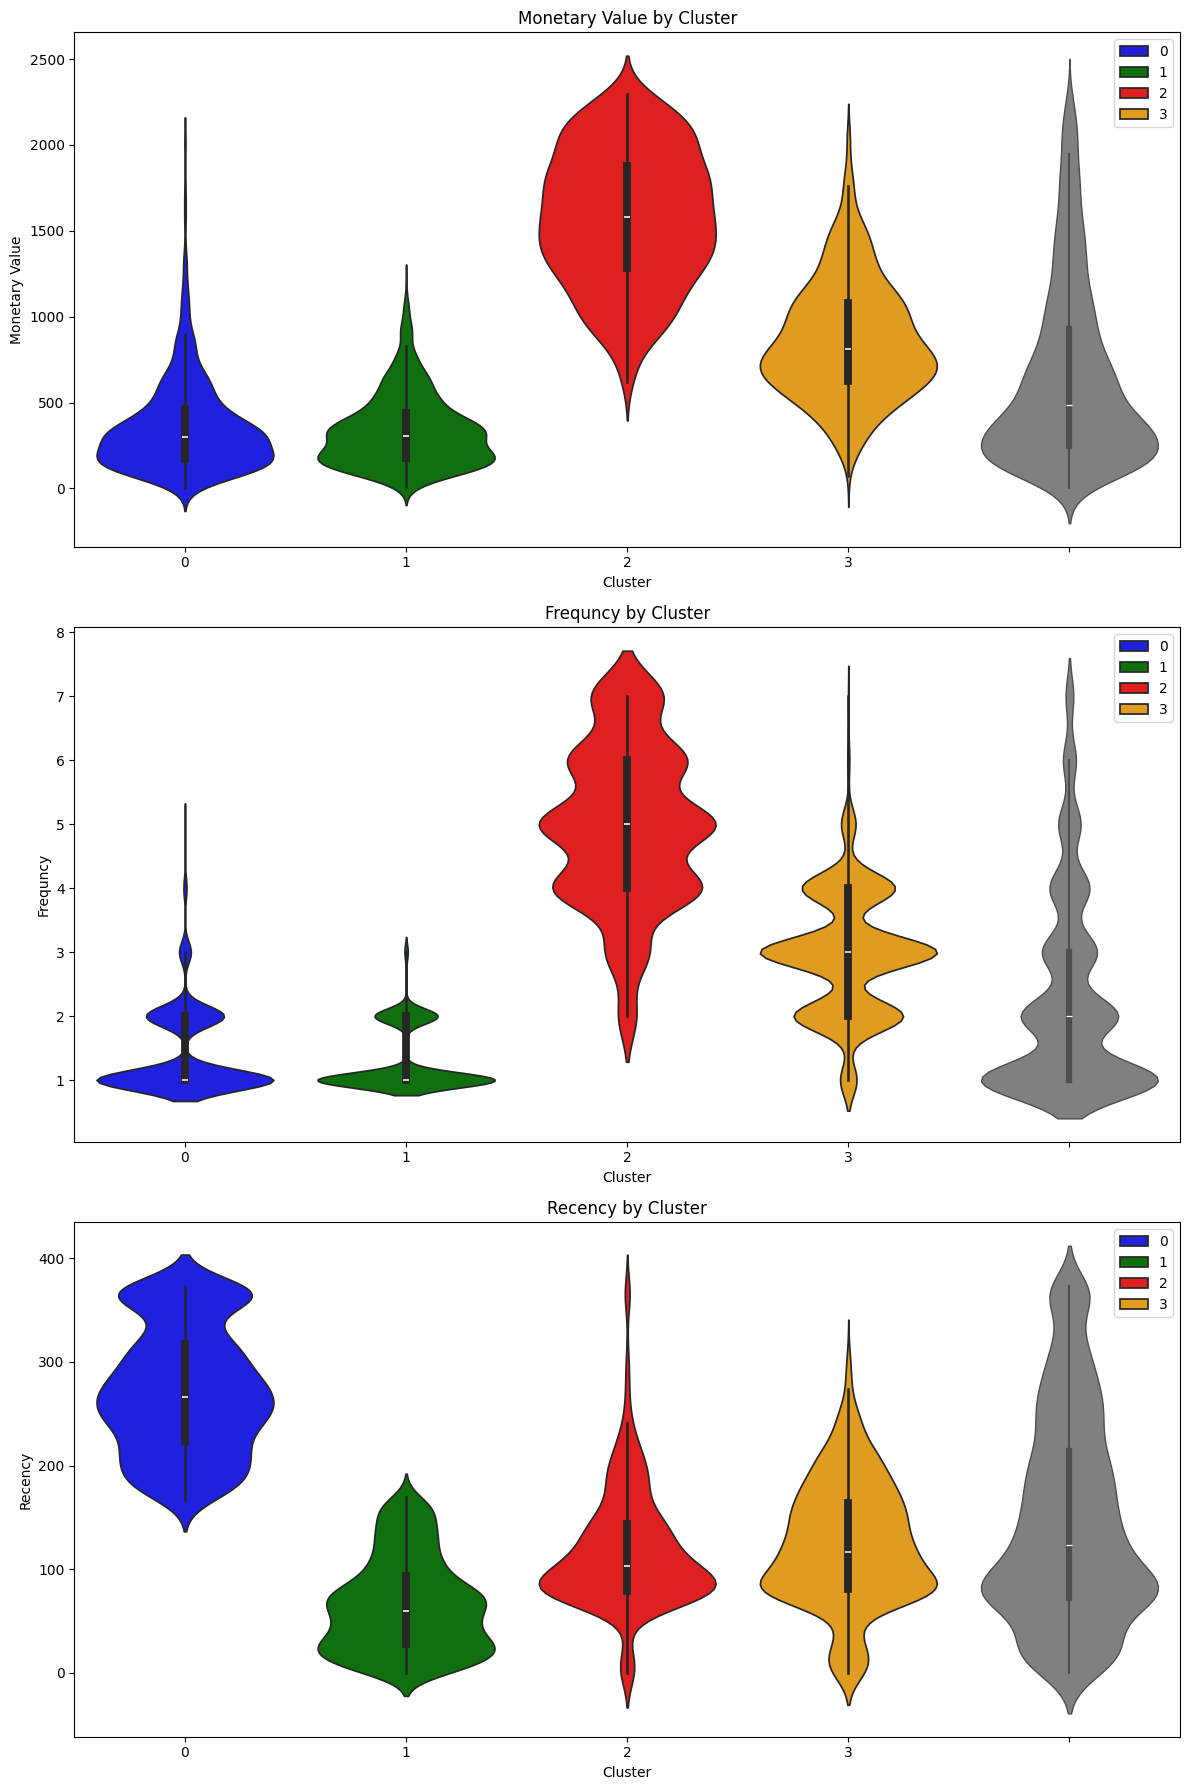

In [46]:
# Below are violin plots to show the distrebutions of clusters per feature:
plt.figure(figsize=(12,18))

plt.subplot(3 , 1 , 1)
sns.violinplot(x=non_outliers_df['Cluster'] , y=non_outliers_df['MonetaryValue'] , palette=cluster_colors , hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'] , color ='grey' , linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3 , 1 , 2)
sns.violinplot(x=non_outliers_df['Cluster'] , y=non_outliers_df['Frequncy'] , palette=cluster_colors , hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequncy'] , color ='grey' , linewidth=1.0)
plt.title("Frequncy by Cluster")
plt.ylabel("Frequncy")

plt.subplot(3 , 1 , 3)
sns.violinplot(x=non_outliers_df['Cluster'] , y=non_outliers_df['Recency'] , palette=cluster_colors , hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'] , color ='grey' , linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()


**The violin plots showed the different characteristics of each cluster**

**Cluster 0:**
Characteristics: Medium monetary value, low frequency, high recency (inactive for a long time).
Actionable Name: "Win-Back Campaign"
Action: Focus on re-engaging these customers with promotions, personalized offers, or loyalty incentives to bring them back.
**Cluster 1:**

Characteristics: Lowest monetary value, lowest frequency, moderately inactive.
Actionable Name: "Minimal Effort Group"
Action: Reduce marketing costs and effort on this group unless there's an easy, cost-effective strategy to improve their activity (e.g., mass promotional emails).

**Cluster 2:**

Characteristics: Highest monetary value, highest frequency, most recent activity.
Actionable Name: "Loyal VIPs"
Action: Focus on retention strategies, exclusive rewards, VIP programs, and maintain their loyalty.

**Cluster 3:**

Characteristics: Medium to high monetary value, medium recency, low to medium frequency.
Actionable Name: "Upsell Potential"
Action: Target with upselling strategies, personalized recommendations, and campaigns encouraging more frequent purchases.
Summary of Actionable Cluster Names:

Cluster 0: Win-Back Campaign

Cluster 1: Minimal Effort Group

Cluster 2: Loyal VIPs

Cluster 3: Upsell Potential

Now when it comes to the rest of the data (outliers)
We'll label them according to our cluster findings in the data.

In [47]:
# At first since we have observed a high colleration between frequency and monetary value, we'll find the outliers in both:
overlap_indices = monetary_outliers_df.index.intersection(Frequncy_outliers_df.index)
frequncy_and_monetary_outliers = monetary_outliers_df.loc[overlap_indices]
frequncy_and_monetary_outliers.shape

(445, 5)

In [48]:
# Now we'll find outliers in terms of monetary value and frequency separately:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
monetary_only_outliers.shape

(316, 5)

In [49]:
frequncy_only_outliers = Frequncy_outliers_df.drop(overlap_indices)
frequncy_only_outliers.shape

(108, 5)

In [50]:
# Now we'll assign each a cluster according to our findings:
monetary_only_outliers["Cluster"] = 4
frequncy_only_outliers["Cluster"] = 5
frequncy_and_monetary_outliers["Cluster"] = 6

In [51]:
# With that being done lets concat them:
outlier_clusters_df = pd.concat([monetary_only_outliers , frequncy_only_outliers , frequncy_and_monetary_outliers])

In [52]:
outlier_clusters_df.shape

(869, 6)

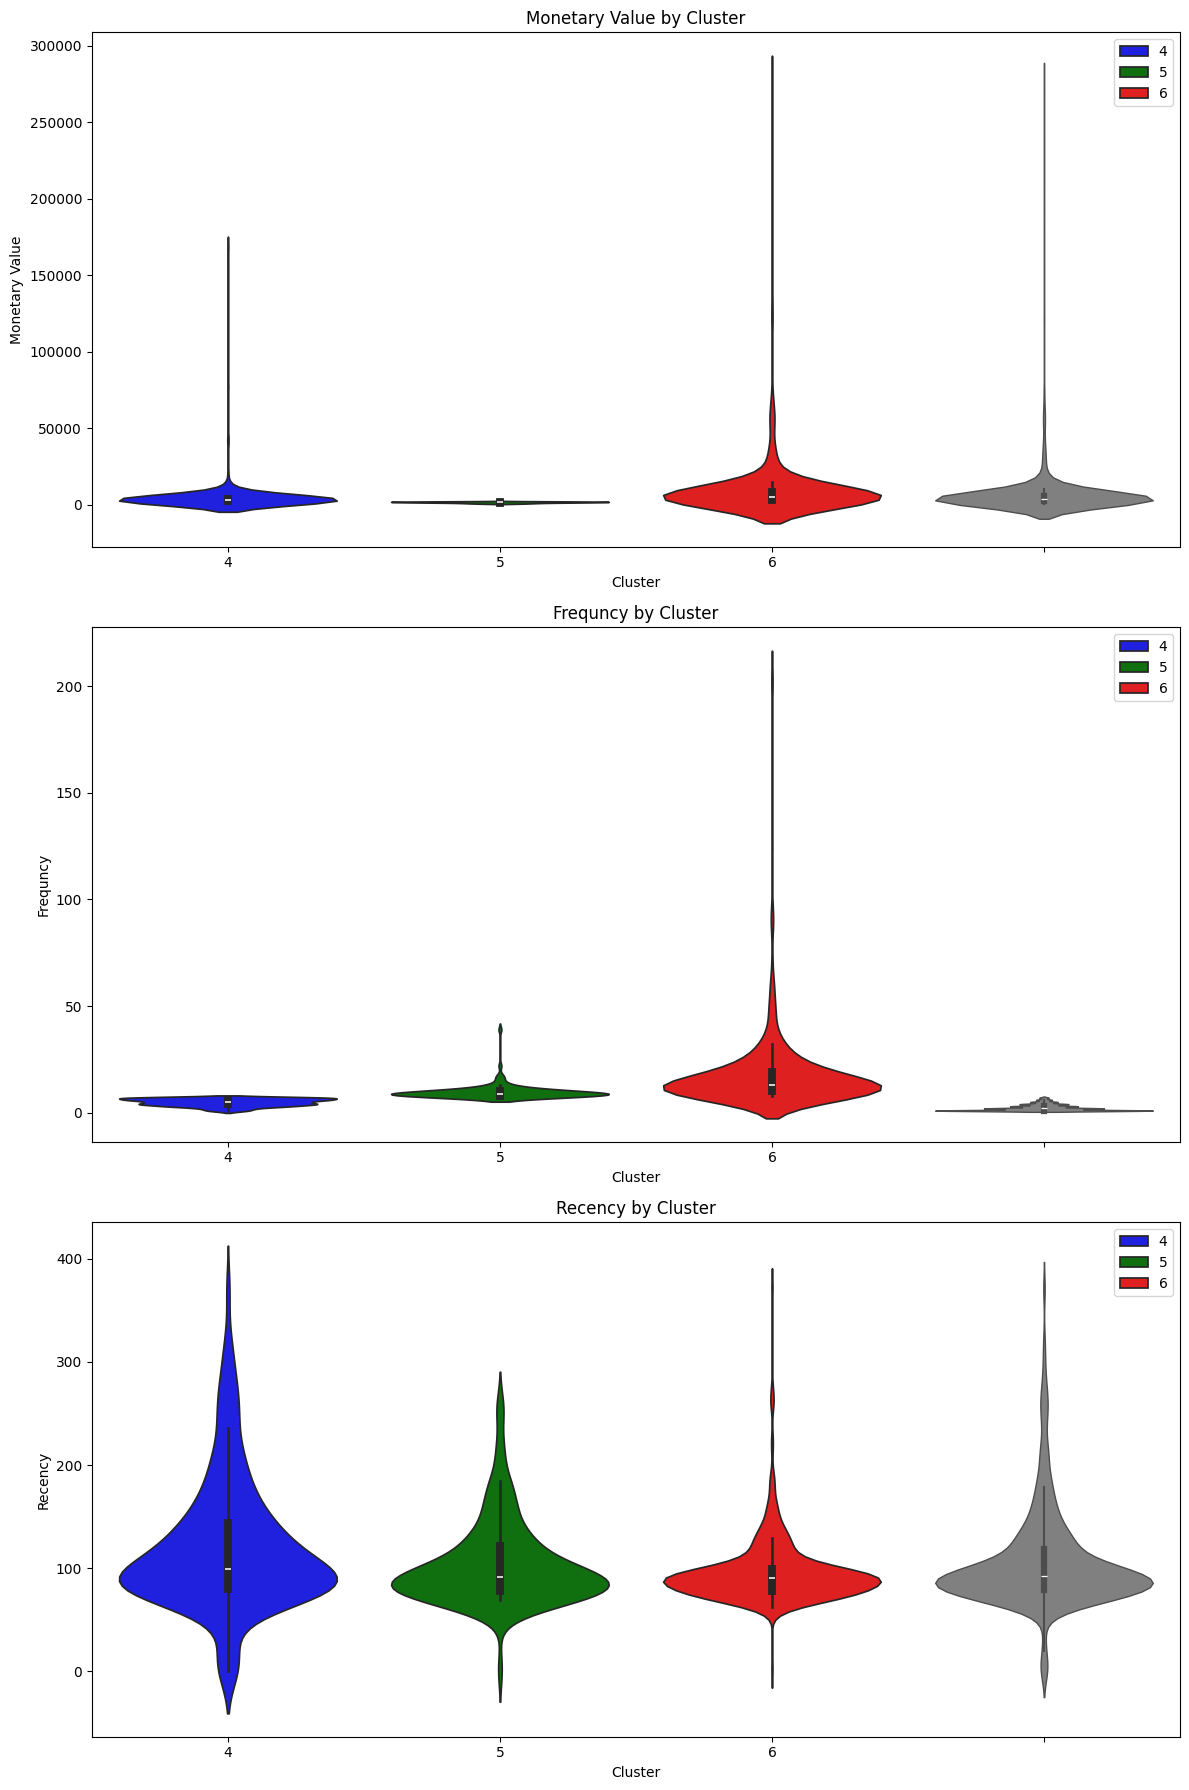

In [53]:
cluster_colors = {
    4: "blue",
    5: "green",
    6: "red"}
plt.figure(figsize=(12,18))

plt.subplot(3 , 1 , 1)
sns.violinplot(x=outlier_clusters_df['Cluster'] , y=outlier_clusters_df['MonetaryValue'] , palette=cluster_colors , hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'] , color ='grey' , linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3 , 1 , 2)
sns.violinplot(x=outlier_clusters_df['Cluster'] , y=outlier_clusters_df['Frequncy'] , palette=cluster_colors , hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequncy'] , color ='grey' , linewidth=1.0)
plt.title("Frequncy by Cluster")
plt.ylabel("Frequncy")

plt.subplot(3 , 1 , 3)
sns.violinplot(x=outlier_clusters_df['Cluster'] , y=outlier_clusters_df['Recency'] , palette=cluster_colors , hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'] , color ='grey' , linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()


Outlier Cluster Names and Actions

Cluster 6 (Red):

Characteristics:
Very high monetary value.
High frequency.
Moderate recency (engaged but could be improved).
Actionable Name: "High Value Retention Targets" Action: Focus on retaining these customers by offering loyalty programs, VIP memberships, and personalized offers to maintain their high spending and frequency.


Cluster 5 (Green):

Characteristics:
Moderate monetary value.
Low frequency.
High recency (not engaged recently).
Actionable Name: "Re-Engagement Campaigns" Action: Use targeted promotions and marketing campaigns to re-engage this group, emphasizing reasons to return and increase their purchase frequency.


Cluster 4 (Blue):

Characteristics:
Low monetary value.
Low frequency.
High recency (inactive for a long time).
Actionable Name: "Dormant Customers" Action: Decide whether to re-engage these customers through cost-effective strategies (e.g., email campaigns) or deprioritize them in marketing efforts.

Summary of Actionable Names:

Cluster 6 (Red): High Value Retention Targets

Cluster 5 (Green): Re-Engagement Campaigns

Cluster 4 (Blue): Dormant Customers

**With that being said our clustering is done**

In [54]:
cluster_labels = {
  0 : "Win-Back Campaign",

  1 : "Minimal Effort Group" ,

  2 : "Loyal VIPs" ,

  3 : "Upsell Potential" ,

  6 : "High Value Retention Targets" ,

  5 : "Re-Engagement Campaigns" ,

  4 : "Dormant Customers"
}


In [55]:
# Now collect all of them together:
full_clustering_df = pd.concat([non_outliers_df , outlier_clusters_df])

In [56]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df.head()

CustomerID  MonetaryValue  Frequncy     LastInvoiceDate  Recency  Cluster  \
2     12348.0        1437.24         4 2011-09-25 13:13:00       74        2   
3     12349.0        1457.55         1 2011-11-21 09:51:00       18        3   
4     12350.0         294.40         1 2011-02-02 16:01:00      309        0   
5     12352.0        1385.74         7 2011-09-28 14:58:00       71        2   
6     12353.0          89.00         1 2011-05-19 17:47:00      203        0   

        ClusterLabel  
2         Loyal VIPs  
3   Upsell Potential  
4  Win-Back Campaign  
5         Loyal VIPs  
6  Win-Back Campaign

In [57]:
full_clustering_df.shape

(4334, 7)

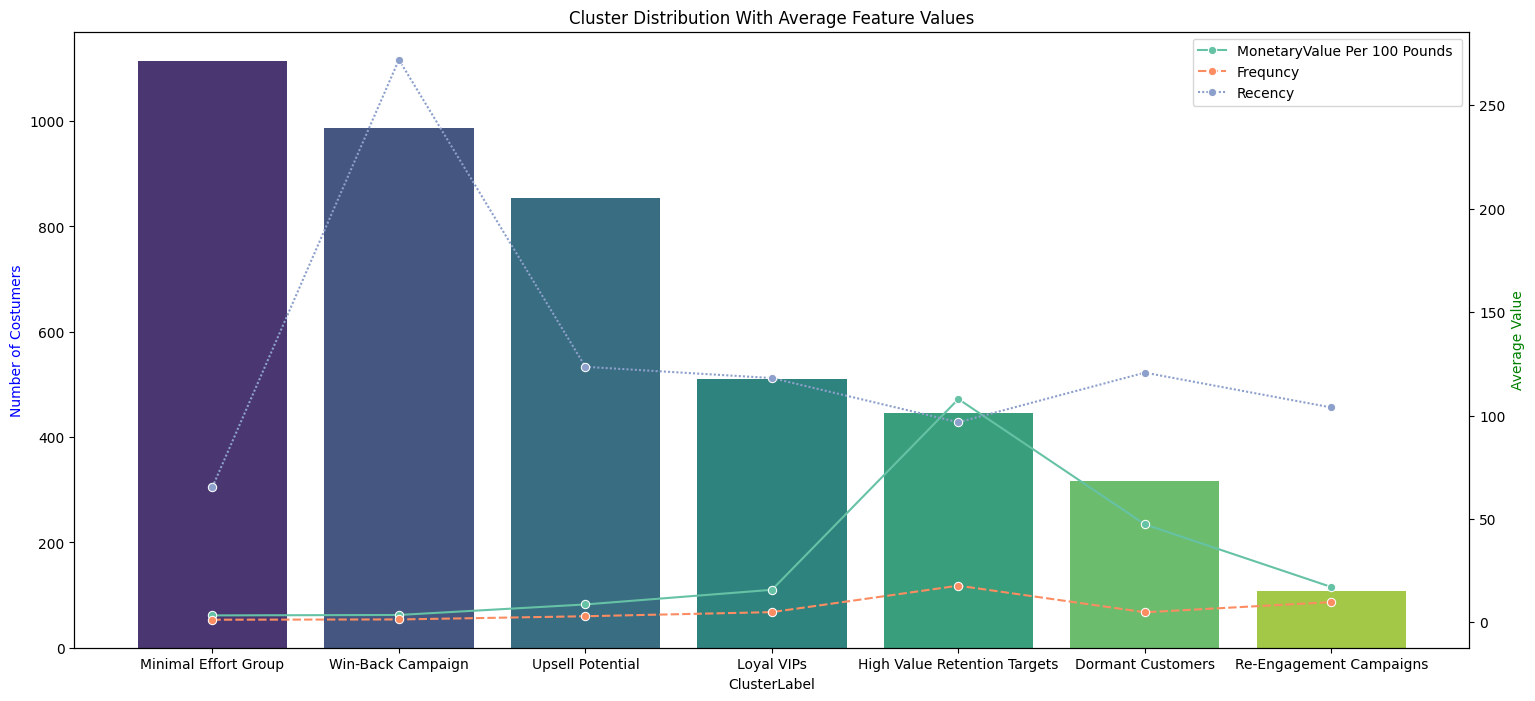

In [58]:
cluster_counts = full_clustering_df["ClusterLabel"].value_counts()

full_clustering_df["MonetaryValue Per 100 Pounds "] = full_clustering_df["MonetaryValue"] / 100
feature_means = full_clustering_df.groupby("ClusterLabel")[["MonetaryValue Per 100 Pounds " , "Frequncy" , "Recency"]].mean()

fig , ax1 = plt.subplots(figsize=(18,8))

sns.barplot(x=cluster_counts.index , y=cluster_counts.values , ax=ax1 , palette='viridis' ,hue = cluster_counts.index)
ax1.set_ylabel("Number of Costumers" , color = 'b')
ax1.set_title("Cluster Distribution With Average Feature Values")

ax2 = ax1.twinx()

sns.lineplot(data=feature_means , ax=ax2 , palette = 'Set2' , marker = 'o')
ax2.set_ylabel("Average Value" , color = 'g')

plt.show()

In [59]:
full_clustering_df.to_csv("Full_Clustering_DataFrame_labeled.csv")

# As we're applying the cluster and classify approuch
***We'll use our clusters to classify customer's behavior***


## Classification Analysis
### Define Target Variable
- Use clusters as labels to predict customer segments based on their purchasing behavior.

### Data Preparation
- Split the data into training and testing sets, preparing for classification modeling.

### Model Selection and Training
- Train multiple classification models, including Random Forest, SVM, and Logistic Regression.

### Hyperparameter Tuning
- Optimize model parameters using GridSearchCV to improve performance.


In [125]:
dfc = pd.read_csv("/content/Full_Clustering_DataFrame_labeled.csv")

dfc

Unnamed: 0  CustomerID  MonetaryValue  Frequncy      LastInvoiceDate  \
0              2     12348.0        1437.24         4  2011-09-25 13:13:00   
1              3     12349.0        1457.55         1  2011-11-21 09:51:00   
2              4     12350.0         294.40         1  2011-02-02 16:01:00   
3              5     12352.0        1385.74         7  2011-09-28 14:58:00   
4              6     12353.0          89.00         1  2011-05-19 17:47:00   
...          ...         ...            ...       ...                  ...   
4329        4287     18223.0        6484.54        14  2011-09-04 11:49:00   
4330        4289     18225.0        5509.12        12  2011-09-16 15:23:00   
4331        4290     18226.0        5228.05        11  2011-09-19 09:14:00   
4332        4293     18229.0        7276.90        20  2011-09-07 10:51:00   
4333        4313     18257.0        2337.63         8  2011-08-17 14:47:00   

      Recency  Cluster                  ClusterLabel  \
0          74        2                    Loyal VIPs   
1          18        3              Upsell Potential   
2         309        0             Win-Back Campaign   
3          71        2                    Loyal VIPs   
4         203        0             Win-Back Campaign   
...       ...      ...                           ...   
4329       96        6  High Value Retention Targets   
4330       83        6  High Value Retention Targets   
4331       81        6  High Value Retention Targets   
4332       93        6  High Value Retention Targets   
4333      113        6  High Value Retention Targets   

      MonetaryValue Per 100 Pounds   
0                           14.3724  
1                           14.5755  
2                            2.9440  
3                           13.8574  
4                            0.8900  
...                             ...  
4329                        64.8454  
4330                        55.0912  
4331                        52.2805  
4332                        72.7690  
4333                        23.3763  

[4334 rows x 9 columns]

In [126]:
fig = px.pie(dfc, names = 'ClusterLabel', title = 'Customer Segmentation: Campaign and Target Groups')
fig.show()

In [127]:
fig = px.scatter_3d(dfc, x = 'MonetaryValue', y = 'Frequncy', z = 'Recency', color = dfc['ClusterLabel'], symbol = dfc['ClusterLabel'])
fig.show()

In [128]:
fig = px.histogram(dfc, x = 'ClusterLabel', color= 'ClusterLabel', title = 'Customer Segmentation: Campaign and Target Groups')
fig.show()

# **Train test split**

# Splitting and preprocessing the data

In [129]:
# y will be our target label (our clusters)
y = dfc["Cluster"]
y

0       2
1       3
2       0
3       2
4       0
       ..
4329    6
4330    6
4331    6
4332    6
4333    6
Name: Cluster, Length: 4334, dtype: int64

In [130]:
# We'll select the most important features
mask = ["MonetaryValue",	"Frequncy", "Recency"]
dfc_for_classification = dfc[mask]
dfc_for_classification

MonetaryValue  Frequncy  Recency
0           1437.24         4       74
1           1457.55         1       18
2            294.40         1      309
3           1385.74         7       71
4             89.00         1      203
...             ...       ...      ...
4329        6484.54        14       96
4330        5509.12        12       83
4331        5228.05        11       81
4332        7276.90        20       93
4333        2337.63         8      113

[4334 rows x 3 columns]

In [131]:
x = dfc_for_classification
x

MonetaryValue  Frequncy  Recency
0           1437.24         4       74
1           1457.55         1       18
2            294.40         1      309
3           1385.74         7       71
4             89.00         1      203
...             ...       ...      ...
4329        6484.54        14       96
4330        5509.12        12       83
4331        5228.05        11       81
4332        7276.90        20       93
4333        2337.63         8      113

[4334 rows x 3 columns]

In [132]:
# Train test split:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

x_train

MonetaryValue  Frequncy  Recency
2114         662.38         3      151
4152        3285.31         8      121
246          344.54         1      256
4034      116729.63        54       92
923          169.55         2      245
...             ...       ...      ...
3444         804.02         2      122
466          236.02         1      336
3092         712.29         2      119
3772        8438.34         6       17
860         1595.48         1      128

[3033 rows x 3 columns]

In [133]:
# Scale our data:
scaler = StandardScaler()
# To avoid data leakage we split our data first then fit transform the training data, after that transform our testing data.
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# **Support Vector Classifier**

***Train and fit the classifier***

In [134]:
svc_clf = SVC()

svc_clf.fit(x_train_scaled , y_train)

SVC()

***Predict labels using classifier***

In [135]:
svc_clf_pred = svc_clf.predict(x_test_scaled)

# **Decision Tree Classifier**

***Train and fit the classifier***

In [136]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_scaled , y_train)

DecisionTreeClassifier()

***Predict labels using classifier***

In [137]:
dtc_pred = dtc.predict(x_test_scaled)

# **K-Neighbors Classifier**

***Train and fit the classifier***

In [138]:
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(x_train_scaled, y_train)

KNeighborsClassifier()

***Predict labels using classifier***

In [139]:
neigh_pred = neigh.predict(x_test_scaled)

# **Naive Bayes Classifier**

In [140]:
nbc = GaussianNB()

nbc.fit(x_train_scaled , y_train)

GaussianNB()

In [141]:
nbc_pred = nbc.predict(x_test_scaled)

# **MLP Classifier**

***Train and fit the classifier***

In [142]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

mlp_clf.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

***Predict labels using classifier***

In [143]:
mlp_pred = mlp_clf.predict(x_test_scaled)

# **Ensemble Learning Classifiers**

# **RandomForest with hyper parameter tuning**

***Train and fit the classifier***

In [144]:
param_grid = [

# try 12 (3x4) combinations of hyperparameters
{ 'n_estimators': [3, 10, 301]},
# then try 6 (2x3) combinations with bootstrap set as False
{ 'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4] },
]

rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(rfc, param_grid, cv=5,
scoring='accuracy' ,
return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [3, 10, 301]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [145]:
rfc_clf = grid_search.best_estimator_

rfc_clf


RandomForestClassifier(n_estimators=301)

***Predict labels using classifier***

In [146]:
rfc_pred = rfc_clf.predict(x_test_scaled)

# **STACKING Classifier**

***Train and fit the classifier***

In [147]:
clf1 = KNeighborsClassifier(n_neighbors=3)

clf2 = RandomForestClassifier(random_state=1)

clf3 = GaussianNB()

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf1, clf2, clf3],
                          meta_classifier=lr)

# **Stacking with hyper parameter tuning**


In [148]:
params = {'kneighborsclassifier-1__n_neighbors': [1,3,4, 5,6],
          'kneighborsclassifier-2__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50, 300],
          'meta_classifier__C': [0.1, 10.0, 0.001, 0.01]}

grid = GridSearchCV(estimator=sclf,
                    param_grid=params,
                    cv=5,
                    refit=True)
grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5,
             estimator=StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=3),
                                                       KNeighborsClassifier(n_neighbors=3),
                                                       RandomForestClassifier(random_state=1),
                                                       GaussianNB()],
                                          meta_classifier=LogisticRegression()),
             param_grid={'kneighborsclassifier-1__n_neighbors': [1, 3, 4, 5, 6],
                         'kneighborsclassifier-2__n_neighbors': [1, 5],
                         'meta_classifier__C': [0.1, 10.0, 0.001, 0.01],
                         'randomforestclassifier__n_estimators': [10, 50, 300]})

In [149]:
stack_clf = grid.best_estimator_

stack_clf

StackingClassifier(classifiers=[KNeighborsClassifier(), KNeighborsClassifier(),
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=1),
                                GaussianNB()],
                   meta_classifier=LogisticRegression(C=10.0))

***Predict labels using classifier***

In [150]:
stack_pred = stack_clf.predict(x_test_scaled)
stack_pred

array([1, 0, 3, ..., 0, 0, 6])

# **Bagging Classifier**

In [151]:
base_clf = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

bagging_clf.fit(x_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [152]:
bagging_pred = bagging_clf.predict(x_test_scaled)

# **AdaBoost Classifier With Hyperparameter Tuning**

In [153]:
abc= AdaBoostClassifier()

In [154]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5)


grid_search.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]})

In [155]:
abc_clf = grid_search.best_estimator_

In [156]:
abc_pred = abc_clf.predict(x_test_scaled)

#**Gradient Boosting Classifier**

In [157]:
xgbC = GradientBoostingClassifier()

xgbC.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

In [158]:
xgbC_pred = xgbC.predict(x_test_scaled)


## Model Evaluation
### Classification Metrics
- Assess classification models using accuracy, precision, recall, and F1-score.

### Confusion Matrix
- Display the confusion matrix to understand model performance in predicting each cluster.

### Comparative Summary
- Summarize results across models, highlighting the best-performing model.


# **SVC Evaluation**

In [192]:
sorted_labels = sorted(cluster_labels.keys())
mapped_labels = [cluster_labels[label] for label in sorted_labels]

In [193]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, svc_clf_pred), annot=True, fmt='g', cmap='BuPu', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# The confusion matrix is a very good way to identify the labels that the model confuses.
# As we notice from the heatmap, the model has a really tough time with identefying re-engagment campaings label

In [160]:
print(classification_report(y_test , svc_clf_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       285
           1       0.90      0.96      0.93       338
           2       0.85      0.85      0.85       168
           3       0.81      0.77      0.79       253
           4       0.97      0.76      0.86        89
           5       0.89      0.61      0.72        28
           6       0.93      0.97      0.95       140

    accuracy                           0.89      1301
   macro avg       0.90      0.84      0.86      1301
weighted avg       0.89      0.89      0.89      1301



# **Naive Bayes Evaluation**

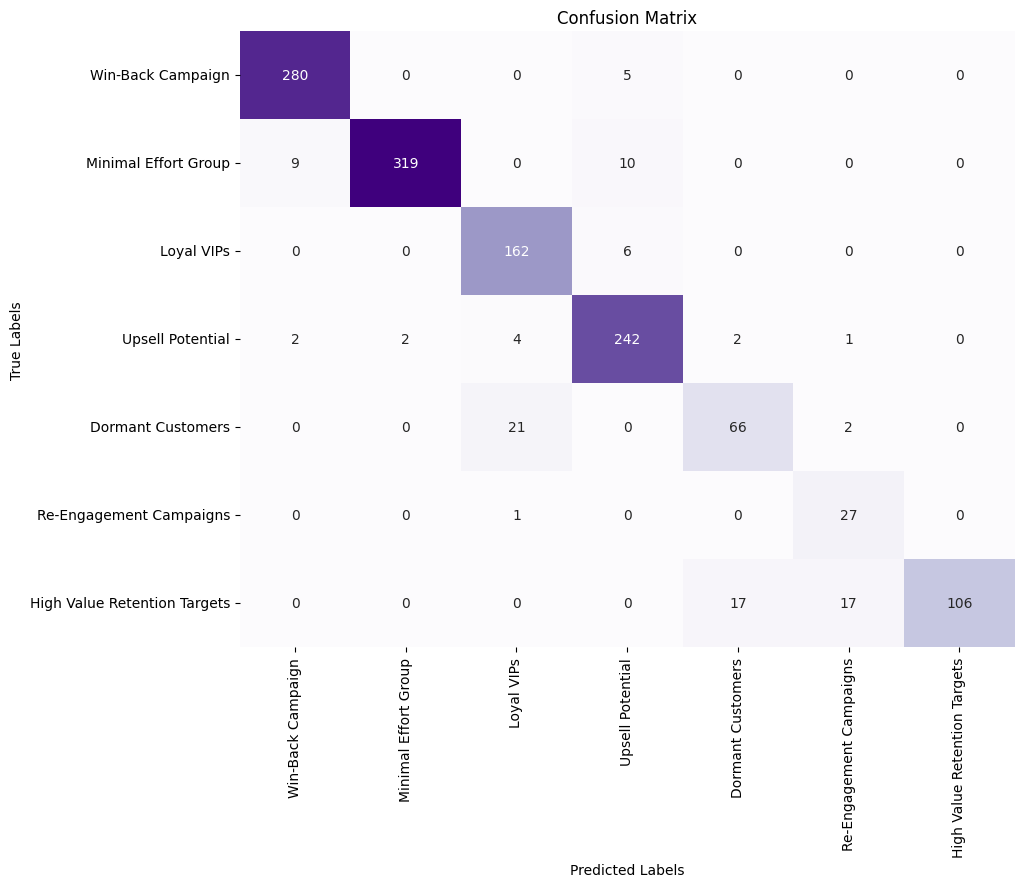

In [194]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, nbc_pred), annot=True, fmt='g', cmap='Purples', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [162]:
print(classification_report(y_test , nbc_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.99      0.94      0.97       338
           2       0.86      0.96      0.91       168
           3       0.92      0.96      0.94       253
           4       0.78      0.74      0.76        89
           5       0.57      0.96      0.72        28
           6       1.00      0.76      0.86       140

    accuracy                           0.92      1301
   macro avg       0.87      0.90      0.88      1301
weighted avg       0.93      0.92      0.92      1301



# **DTC Evaluation**

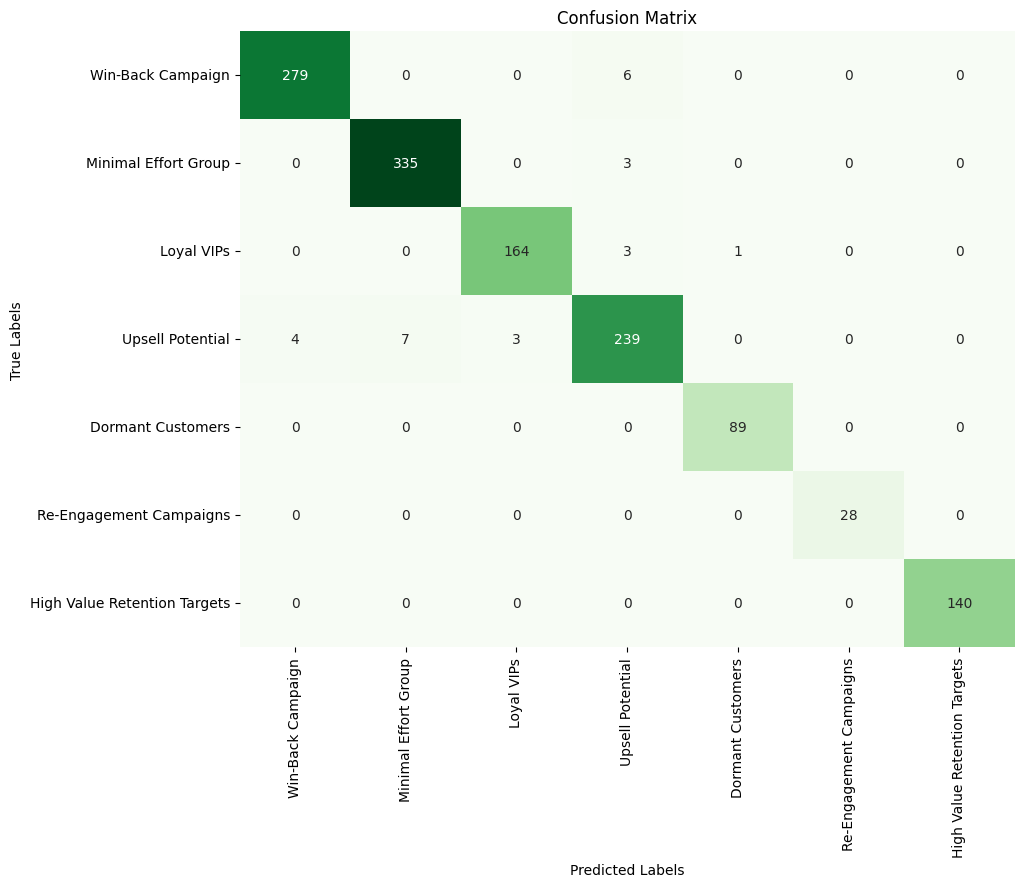

In [195]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, fmt='g', cmap='Greens', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# We notice how the DTC performed way better than the SVC!

In [164]:
print(classification_report(y_test , dtc_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       285
           1       0.98      0.99      0.99       338
           2       0.98      0.98      0.98       168
           3       0.95      0.94      0.95       253
           4       0.99      1.00      0.99        89
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00       140

    accuracy                           0.98      1301
   macro avg       0.98      0.98      0.98      1301
weighted avg       0.98      0.98      0.98      1301



# **KNN Evaluation**

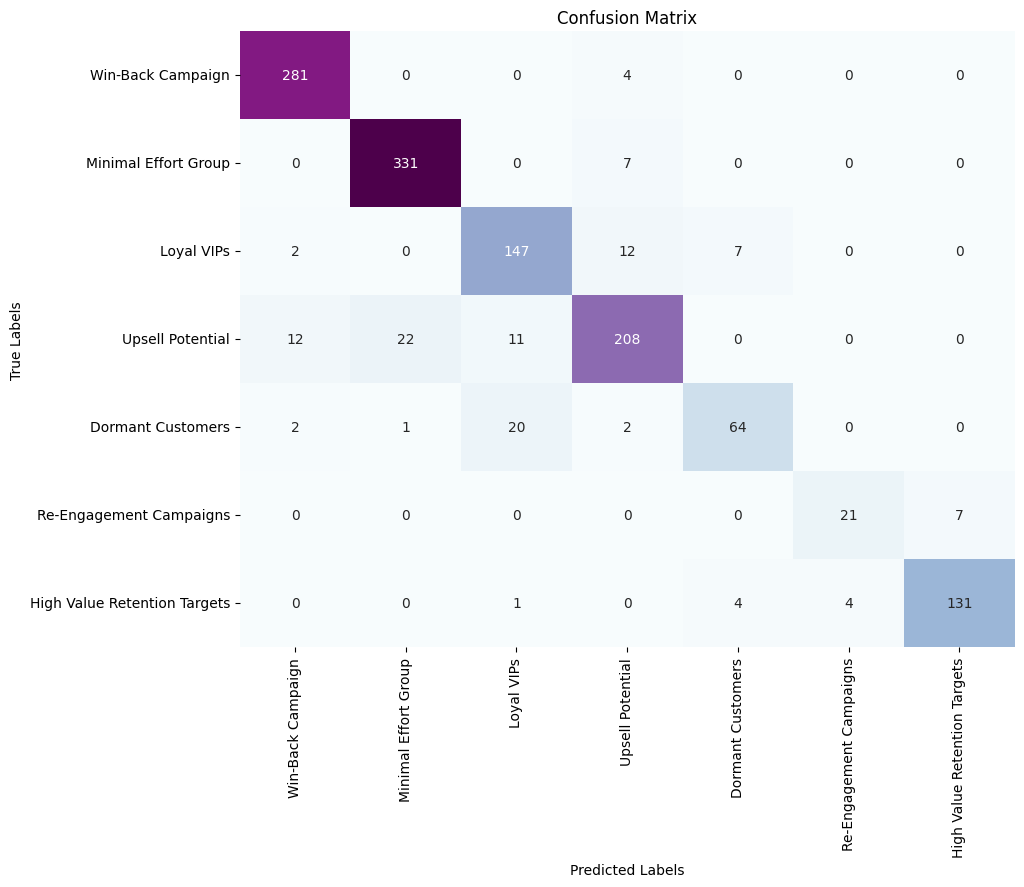

In [196]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, neigh_pred), annot=True, fmt='g', cmap='BuPu', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [166]:
print(classification_report(y_test , neigh_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       285
           1       0.94      0.98      0.96       338
           2       0.82      0.88      0.85       168
           3       0.89      0.82      0.86       253
           4       0.85      0.72      0.78        89
           5       0.84      0.75      0.79        28
           6       0.95      0.94      0.94       140

    accuracy                           0.91      1301
   macro avg       0.89      0.87      0.88      1301
weighted avg       0.91      0.91      0.91      1301



# **RFC Evaluation**

In [197]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, fmt='g', cmap='crest', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [168]:
print(classification_report(y_test , rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.99      0.99      0.99       338
           2       0.99      0.98      0.99       168
           3       0.98      0.95      0.97       253
           4       0.98      1.00      0.99        89
           5       1.00      1.00      1.00        28
           6       1.00      0.99      1.00       140

    accuracy                           0.98      1301
   macro avg       0.99      0.99      0.99      1301
weighted avg       0.98      0.98      0.98      1301



# **Stacking Evaluation**

In [198]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, stack_pred), annot=True, fmt='g', cmap='OrRd', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [170]:
print(classification_report(y_test , stack_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.99      0.99      0.99       338
           2       0.99      0.99      0.99       168
           3       0.99      0.95      0.97       253
           4       0.94      1.00      0.97        89
           5       1.00      0.71      0.83        28
           6       0.94      0.96      0.95       140

    accuracy                           0.98      1301
   macro avg       0.97      0.94      0.95      1301
weighted avg       0.98      0.98      0.97      1301



# **Bagging Evaluation**

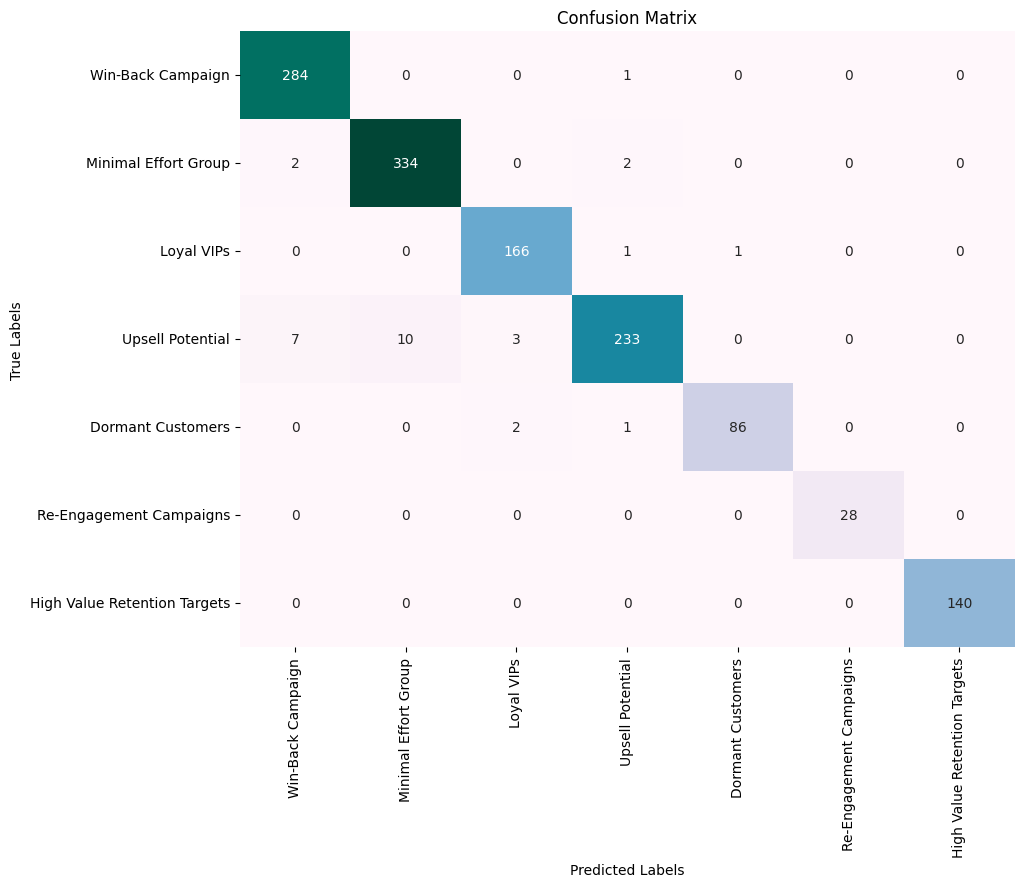

In [199]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, bagging_pred), annot=True, fmt='g', cmap='PuBuGn', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [172]:
print(classification_report(y_test , bagging_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.97      0.99      0.98       338
           2       0.97      0.99      0.98       168
           3       0.98      0.92      0.95       253
           4       0.99      0.97      0.98        89
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00       140

    accuracy                           0.98      1301
   macro avg       0.98      0.98      0.98      1301
weighted avg       0.98      0.98      0.98      1301



# **MLP Evaluation**

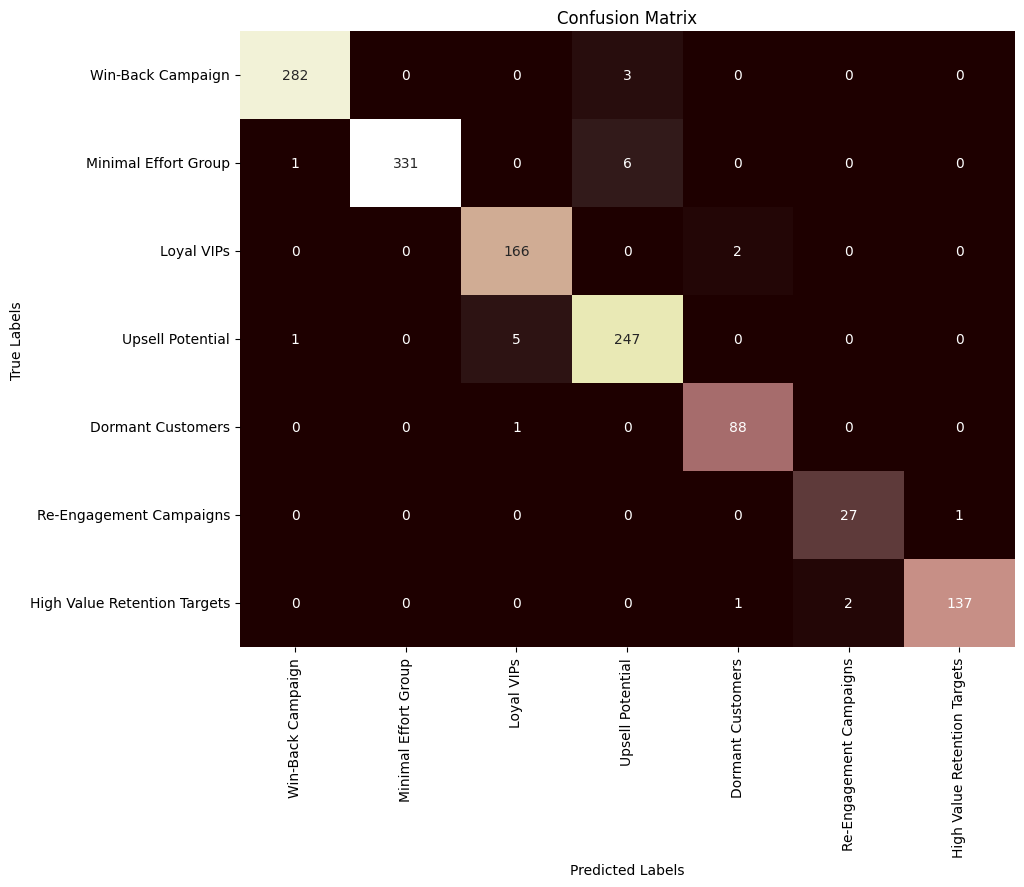

In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='g', cmap='pink', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [174]:
print(classification_report(y_test , mlp_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       1.00      0.98      0.99       338
           2       0.97      0.99      0.98       168
           3       0.96      0.98      0.97       253
           4       0.97      0.99      0.98        89
           5       0.93      0.96      0.95        28
           6       0.99      0.98      0.99       140

    accuracy                           0.98      1301
   macro avg       0.97      0.98      0.98      1301
weighted avg       0.98      0.98      0.98      1301



# ****AdaBoost Evaluation****

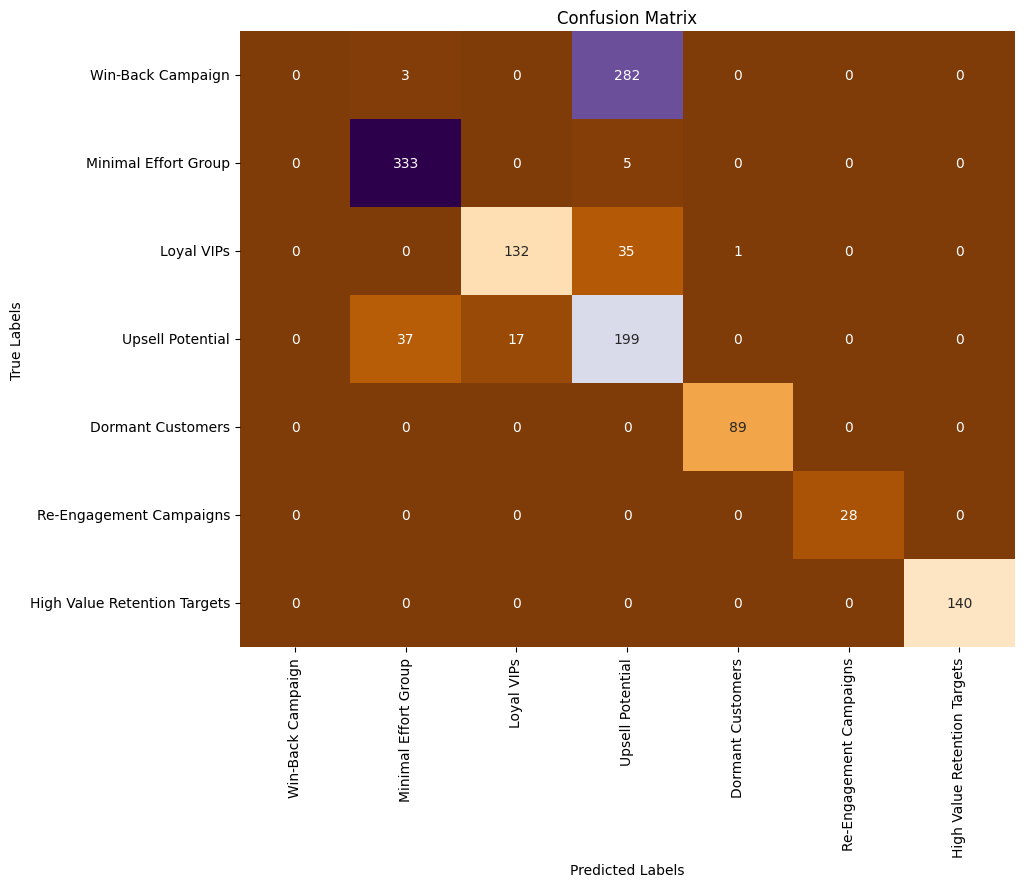

In [201]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, abc_pred), annot=True, fmt='g', cmap='PuOr', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [176]:
print(classification_report(y_test , abc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       285
           1       0.89      0.99      0.94       338
           2       0.89      0.79      0.83       168
           3       0.38      0.79      0.51       253
           4       0.99      1.00      0.99        89
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00       140

    accuracy                           0.71      1301
   macro avg       0.74      0.79      0.75      1301
weighted avg       0.62      0.71      0.65      1301



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# XGBoost Evaluation

In [202]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, xgbC_pred), annot=True, fmt='g', cmap='RdYlBu', cbar=False,
            xticklabels=mapped_labels, yticklabels=mapped_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [178]:
print(classification_report(y_test , xgbC_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       285
           1       0.98      0.99      0.99       338
           2       1.00      0.99      1.00       168
           3       0.98      0.96      0.97       253
           4       0.99      1.00      0.99        89
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00       140

    accuracy                           0.98      1301
   macro avg       0.99      0.99      0.99      1301
weighted avg       0.98      0.98      0.98      1301



# Save models

In [179]:
# svc_clf dtc neigh nbc mlp_clf rfc_clf stack_clf bagging_clf abc_clf

In [180]:
import pickle
import os

# Save the model to a .pkl file
with open('xgbC_model.pkl', 'wb') as file:
    pickle.dump(xgbC, file)

print("Model saved to xgbC_model.pkl")

Model saved to xgbC_model.pkl


In [181]:
# Save the model to a .pkl file
with open('svc_clf_model.pkl', 'wb') as file:
    pickle.dump(svc_clf, file)

print("Model saved to svc_clf_model.pkl")

Model saved to svc_clf_model.pkl


In [182]:
# Save the model to a .pkl file
with open('dtc_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)

print("Model saved to dtc_model.pkl")

Model saved to dtc_model.pkl


In [183]:
# Save the model to a .pkl file
with open('neigh_model.pkl', 'wb') as file:
    pickle.dump(neigh, file)

print("Model saved to neigh_model.pkl")

Model saved to neigh_model.pkl


In [184]:
# Save the model to a .pkl file
with open('nbc_model.pkl', 'wb') as file:
    pickle.dump(nbc, file)

print("Model saved to nbc_model.pkl")

Model saved to nbc_model.pkl


In [185]:
# Save the model to a .pkl file
with open('mlp_clf_model.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)

print("Model saved to mlp_clf_model.pkl")

Model saved to mlp_clf_model.pkl


In [186]:
# Save the model to a .pkl file
with open('rfc_clf_model.pkl', 'wb') as file:
    pickle.dump(rfc_clf, file)

print("Model saved to rfc_clf_model.pkl")

Model saved to rfc_clf_model.pkl


In [187]:
# Save the model to a .pkl file
with open('stack_clf_model.pkl', 'wb') as file:
    pickle.dump(stack_clf, file)

print("Model saved to stack_clf_model.pkl")

Model saved to stack_clf_model.pkl


In [188]:
# Save the model to a .pkl file
with open('bagging_clf_model.pkl', 'wb') as file:
    pickle.dump(bagging_clf, file)

print("Model saved to bagging_clf_model.pkl")

Model saved to bagging_clf_model.pkl


In [189]:
# Save the model to a .pkl file
with open('abc_clf_model.pkl', 'wb') as file:
    pickle.dump(abc_clf, file)

print("Model saved to abc_clf_model.pkl")

Model saved to abc_clf_model.pkl



## Conclusion
Summarize key findings from the clustering and classification analyses. Discuss potential business applications, such as targeted marketing or personalized recommendations, based on customer segmentation insights.
